In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(train.shape,test.shape)

(891, 12) (418, 11)


# Target- Survived

In [5]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Total survival catagory:

0    549
1    342
Name: Survived, dtype: int64

Parcentage of survived:

0    61.616162
1    38.383838
Name: Survived, dtype: float64


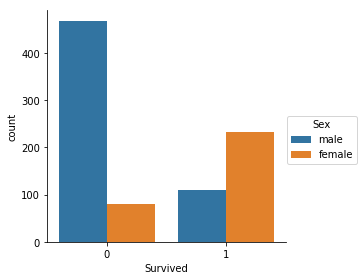

In [6]:
print('Total survival catagory:\n')
print(train['Survived'].value_counts())
print("\nParcentage of survived:\n")

print(train['Survived'].value_counts()/train['Survived'].count()*100)
sns.factorplot("Survived",data=train,hue="Sex",kind='count');

***

***Helper function***

In [7]:
 def infoPrint(dataFrame):
                
        print('Feature information:\n')
        print(dataFrame.head())
        print(dataFrame.describe());
        print('Number of objects:\n')
        print(dataFrame.value_counts());
        print('\nParcentage of objets:\n')
        print(dataFrame.value_counts()/dataFrame.count()*100)
        print('\nMissing Value:',dataFrame.isnull().sum())


# PClass

Feature information:

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64
count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64
Number of objects:

3    491
1    216
2    184
Name: Pclass, dtype: int64

Parcentage of objets:

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64

Missing Value: 0


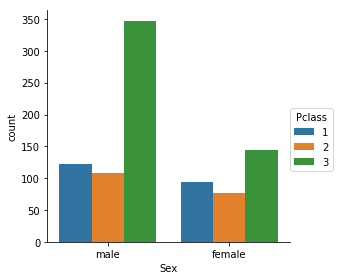

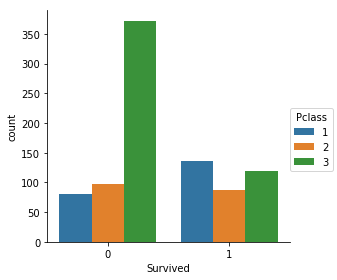

In [8]:
infoPrint(train['Pclass'])
sns.factorplot("Sex",data=train,hue="Pclass",kind='count');
sns.factorplot("Survived",data=train,hue="Pclass",kind='count');

# Sex

Feature information:

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object
count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object
Number of objects:

male      577
female    314
Name: Sex, dtype: int64

Parcentage of objets:

male      64.758698
female    35.241302
Name: Sex, dtype: float64

Missing Value: 0


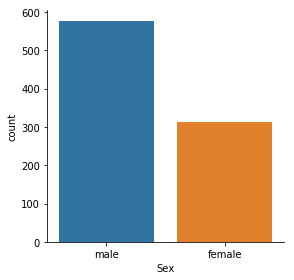

In [9]:
infoPrint(train['Sex'])
sns.factorplot("Sex",data=train,kind='count');

In [10]:
#print('Putting the male is 0 and female is 1')
#df['Sex'] = df['Sex'].map({'male':0,'female':1});

**Extend Sex Feature**

In [11]:
def male_female_child(passenger):
    
    age,sex=passenger
    if age<16:
        return 'child'
    else:
        return sex
    

In [12]:
train['person']=train[['Age','Sex']].apply(male_female_child, axis=1)
test['person']=test[['Age','Sex']].apply(male_female_child, axis=1)

In [13]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


In [14]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,male
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,female
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,male
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,male
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,female


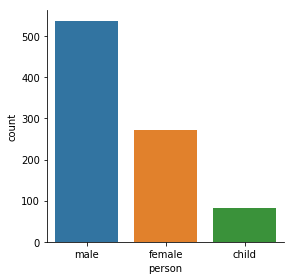

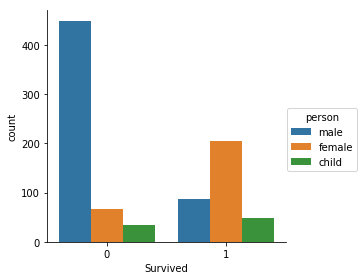

In [15]:
sns.factorplot("person",data=train,kind='count');
sns.factorplot('Survived',data=train,hue='person',kind='count');

# Age

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


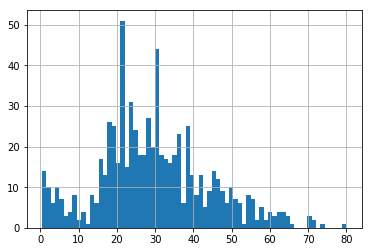

In [16]:
print(train['Age'].describe())
train['Age'].hist(bins=70);

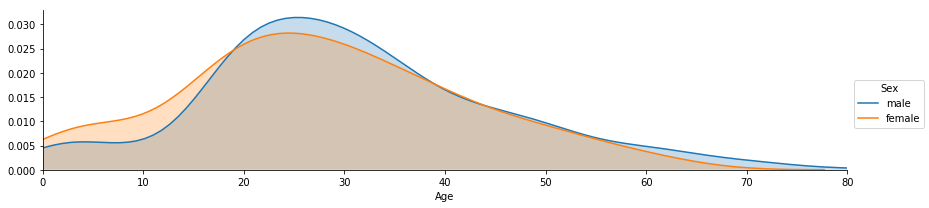

In [17]:
fig = sns.FacetGrid(train,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=train['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend();

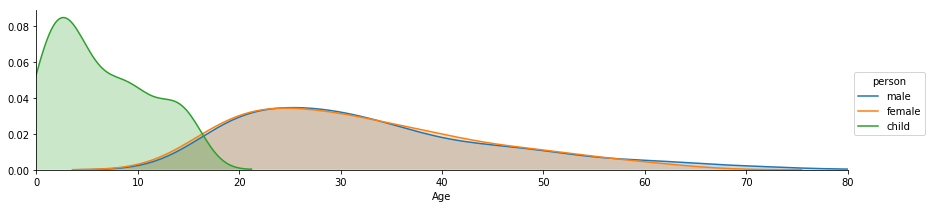

In [18]:
fig = sns.FacetGrid(train,hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=train['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend();

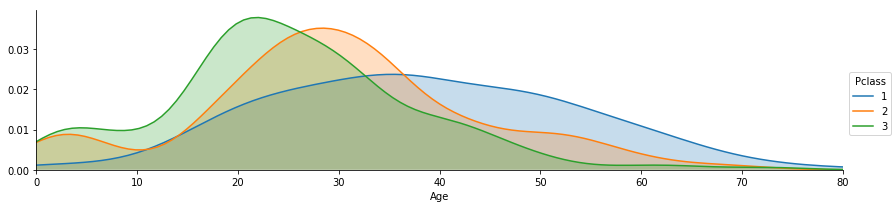

In [19]:
oldest=train['Age'].max()
fig = sns.FacetGrid(train,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
fig.set(xlim=(0,oldest))
fig.add_legend();

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


# Embarked

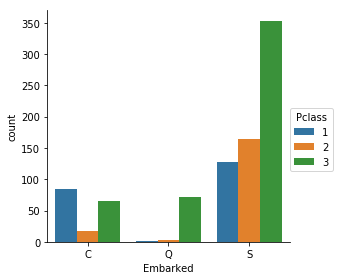

In [21]:
sns.factorplot('Embarked',data=train,hue='Pclass',kind='count',order=['C','Q','S'])

# Alone

In [22]:
train['Alone'] = train.SibSp+ train.Parch
train['Alone'].loc[train['Alone']>0] = 'With Family'
train['Alone'].loc[train['Alone']==0] = 'Alone'

In [23]:
test['Alone'] = test.SibSp+ test.Parch
test['Alone'].loc[test['Alone']>0] = 'With Family'
test['Alone'].loc[test['Alone']==0] = 'Alone'

In [24]:
train['FamilySize'] = train['Parch'] + train['SibSp'] + 1
train['SmallFamily'] = train['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
train['LargeFamily'] = train['FamilySize'].map(lambda s: 1 if 5 <= s else 0)
#train.drop('FamilySize',axis=1, inplace=True)  

In [25]:
test['FamilySize'] = test['Parch'] + test['SibSp'] + 1
test['SmallFamily'] = test['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
test['LargeFamily'] = test['FamilySize'].map(lambda s: 1 if 5 <= s else 0)
#test.drop('FamilySize',axis=1, inplace=True) 

In [26]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,FamilySize,SmallFamily,LargeFamily
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,2,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,2,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,2,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,1,0,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,Alone,1,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone,1,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,With Family,5,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,With Family,3,1,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,With Family,2,1,0


In [27]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,FamilySize,SmallFamily,LargeFamily
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,male,Alone,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,female,With Family,2,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,male,Alone,1,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,male,Alone,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,female,With Family,3,1,0


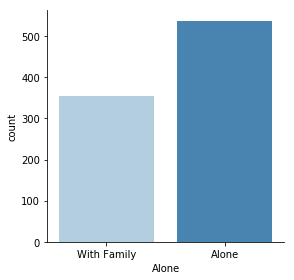

In [28]:
sns.factorplot('Alone',data=train,palette='Blues',kind='count');

**Title**

In [29]:
titles = set()
for name in train['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())
print(titles)

{'Don', 'Rev', 'Miss', 'Sir', 'Mlle', 'the Countess', 'Mrs', 'Jonkheer', 'Col', 'Master', 'Ms', 'Capt', 'Lady', 'Mr', 'Dr', 'Mme', 'Major'}


In [30]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

    # we extract the title from each name
train['Title'] = train['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated title
    # we map each title
train['Title'] = train.Title.map(Title_Dictionary)


In [31]:
test['Title'] = test['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated title
    # we map each title
test['Title'] = test.Title.map(Title_Dictionary)

In [32]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,FamilySize,SmallFamily,LargeFamily,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,2,1,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,2,1,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,1,0,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,2,1,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,1,0,0,Mr


In [33]:
print(train.shape,test.shape)

(891, 18) (418, 17)


# Missing Value Imputing

**Fare**

In [34]:
train['Fare']=train['Fare'].fillna(np.mean(train.Fare))
test['Fare']=test['Fare'].fillna(np.mean(test.Fare))

**Age**

In [35]:
from sklearn.ensemble import RandomForestRegressor

C:\Users\Faysal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [36]:
age_df = train[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]


known_age = age_df[age_df.Age.notnull()].as_matrix()
unknown_age = age_df[age_df.Age.isnull()].as_matrix()


y = known_age[:, 0]


X = known_age[:, 1:]


rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
rfr.fit(X, y)


predictedAges = rfr.predict(unknown_age[:, 1::])


train.loc[ (train.Age.isnull()), 'Age' ] = predictedAges 
#test.loc[ (test.Age.isnull()), 'Age' ] = predictedAges 

In [37]:
age_df = test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]


known_age = age_df[age_df.Age.notnull()].as_matrix()
unknown_age = age_df[age_df.Age.isnull()].as_matrix()


y = known_age[:, 0]


X = known_age[:, 1:]


rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
rfr.fit(X, y)


predictedAges = rfr.predict(unknown_age[:, 1::])


test.loc[ (test.Age.isnull()), 'Age' ] = predictedAges 


**Cabin**

In [38]:
train.loc[ (train.Cabin.notnull()), 'CabinOrNot' ] = "Yes"
train.loc[ (train.Cabin.isnull()), 'CabinOrNot' ] = "No"

In [39]:
test.loc[ (test.Cabin.notnull()), 'CabinOrNot' ] = "Yes"
test.loc[ (test.Cabin.isnull()), 'CabinOrNot' ] = "No"

In [40]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,FamilySize,SmallFamily,LargeFamily,Title,CabinOrNot
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,male,Alone,1,0,0,Mr,No
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,female,With Family,2,1,0,Mrs,No
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,male,Alone,1,0,0,Mr,No
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,male,Alone,1,0,0,Mr,No
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,female,With Family,3,1,0,Mrs,No


In [41]:
Survived_cabin = train.Survived[pd.notnull(train.Cabin)].value_counts()
Survived_nocabin = train.Survived[pd.isnull(train.Cabin)].value_counts()
print(Survived_cabin)
print(Survived_nocabin)

1    136
0     68
Name: Survived, dtype: int64
0    481
1    206
Name: Survived, dtype: int64


In [42]:
train_cabin, test_cabin = set(), set()

for c in train.iloc[:len(train)]['Cabin']:
    try:
        train_cabin.add(c[0])
    except:
        train_cabin.add('U')
        
for c in test.iloc[:len(test)]['Cabin']:
    try:
        test_cabin.add(c[0])
    except:
        test_cabin.add('U')

In [43]:
print(train_cabin)
print(test_cabin)


{'E', 'B', 'U', 'F', 'C', 'A', 'G', 'D', 'T'}
{'B', 'E', 'U', 'F', 'C', 'A', 'G', 'D'}


In [44]:
train.Cabin.fillna('U', inplace=True)

# mapping each Cabin value with the cabin letter
train['Cabin'] = train['Cabin'].map(lambda c: c[0])

In [45]:
test.Cabin.fillna('U', inplace=True)
    
# mapping each Cabin value with the cabin letter
test['Cabin'] = test['Cabin'].map(lambda c: c[0])

In [46]:
cabin_dummies = pd.get_dummies(train['Cabin'], prefix= 'Cabin')
train = pd.concat([train, cabin_dummies], axis=1)
train.drop('Cabin', axis=1, inplace=True)

In [47]:
cabin_dummies = pd.get_dummies(test['Cabin'], prefix= 'Cabin')
test = pd.concat([test, cabin_dummies], axis=1)
test.drop('Cabin', axis=1, inplace=True)

In [48]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,...,Title,CabinOrNot,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_U
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,...,Mr,No,0,0,0,0,0,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,...,Mrs,No,0,0,0,0,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,...,Mr,No,0,0,0,0,0,0,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,...,Mr,No,0,0,0,0,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,...,Mrs,No,0,0,0,0,0,0,0,1


**Embarked**

In [49]:
train['Embarked']=train['Embarked'].fillna('S')
test['Embarked']=train['Embarked'].fillna('S')

In [50]:
train['Title']=train['Title'].fillna('Mr')
test['Title']=test['Title'].fillna('Mr')

In [51]:
print(train.shape,test.shape)

(891, 27) (418, 25)


In [52]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,CabinOrNot,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,No,0,0,0,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,Yes,0,0,1,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,No,0,0,0,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,Yes,0,0,1,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,No,0,0,0,0,0,0,0,0,1


# Ticket

In [53]:
## Treat Ticket by extracting the ticket prefix. When there is no prefix it returns X. 

#Ticket = []
#for i in list(train.Ticket):
#    if not i.isdigit() :
#        Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
#    else:
#        Ticket.append("X")
        
#train["Ticket"] = Ticket
#train = pd.get_dummies(train, columns = ["Ticket"], prefix="Ticket")

In [54]:
## Treat Ticket by extracting the ticket prefix. When there is no prefix it returns X. 



In [55]:
#Ticket_dummies = pd.get_dummies(train['Ticket'], prefix= 'Ticket')
#train = pd.concat([train, Ticket_dummies], axis=1)
#train.drop('Ticket', axis=1, inplace=True)

# One Hot Encoding

In [57]:
y = train['Survived']
train.drop('Survived',axis=1,inplace=True)

In [58]:
df = train.append(test)
df.reset_index(inplace=True)
df.drop(['index','PassengerId','Name',], inplace=True, axis=1)

In [59]:
df.shape

(1309, 24)

In [60]:
Ticket = []
for i in list(df.Ticket):
    if not i.isdigit() :
        Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
    else:
        Ticket.append("X")
        
df["Ticket"] = Ticket
df = pd.get_dummies(df, columns = ["Ticket"], prefix="Ticket")

In [64]:
df.shape

(1309, 60)

In [65]:
# Mapping Fare
df.loc[ df['Fare'] <= 7.91, 'Fare'] = 0
df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare']   = 2
df.loc[ df['Fare'] > 31, 'Fare'] = 3
df['Fare'] = df['Fare'].astype(int)

In [66]:
# Mapping Age
df.loc[ df['Age'] <= 16, 'Age'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
df.loc[ df['Age'] > 64, 'Age'] = 4

In [67]:
df.head()

,Age,Alone,CabinOrNot,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,...,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_X
0,1.0,With Family,No,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,With Family,Yes,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,Alone,No,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2.0,With Family,Yes,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2.0,Alone,No,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [68]:
df['Title'].value_counts()

Mr         758
Miss       262
Mrs        200
Master      61
Officer     23
Royalty      5
Name: Title, dtype: int64

In [69]:
df['Sex'] = df['Sex'].map({'male':0,'female':1})
df['CabinOrNot'] = df['CabinOrNot'].map({'No':0,'Yes':1})
df['Embarked'] = df['Embarked'].map({'S':0,'C':1,'Q':2})
df['person'] = df['person'].map({'male':0,'female':1,'child':2})
df['Alone'] = df['Alone'].map({'With Family':0,'Alone':1})
df['Title'] = df['Title'].map({'Mr':0,'Miss':1,'Mrs':2,'Master':3,'Officer':4,'Royalty':5})

In [70]:
df['Sib+Parch'] = df['SibSp'] + df['Parch']
df['Age+SibSp'] = df['SibSp'] + df['Age']
df['Age+Parch'] = df['Parch'] + df['Age']
df['Age*Fare'] = df['Fare'] * df['Age']
df['Pclass+SibSp'] = df['SibSp'] * df['Pclass']

In [87]:
df.shape

(1309, 65)

In [88]:
df.drop('Cabin_T',inplace=True,axis=1)           

In [89]:
df.isnull().sum().sum()

0

# Seperate Train and Test

In [90]:
Xtrain = df.iloc[:len(train)]

Xtest = df.iloc[len(train):]

In [91]:
Xtrain.head()


,Age,Alone,CabinOrNot,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,...,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_X,Sib+Parch,Age+SibSp,Age+Parch,Age*Fare,Pclass+SibSp
0,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2.0,1.0,0.0,3
1,2.0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,3.0,2.0,6.0,1
2,1.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1.0,1.0,1.0,0
3,2.0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,1,3.0,2.0,6.0,1
4,2.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,2.0,2.0,2.0,0


# Modelling 

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [93]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(Xtrain, y)

In [94]:
features = pd.DataFrame()
features['feature'] = Xtrain.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

In [176]:
features*100

,importance
feature,
Ticket_AQ3,0.000000
Ticket_STONOQ,0.000000
Ticket_AQ4,0.000000
Ticket_LP,0.000000
Ticket_SCA3,0.000000
Ticket_A,0.000000
Ticket_Fa,0.003680
Ticket_CASOTON,0.005002
Ticket_SP,0.007142


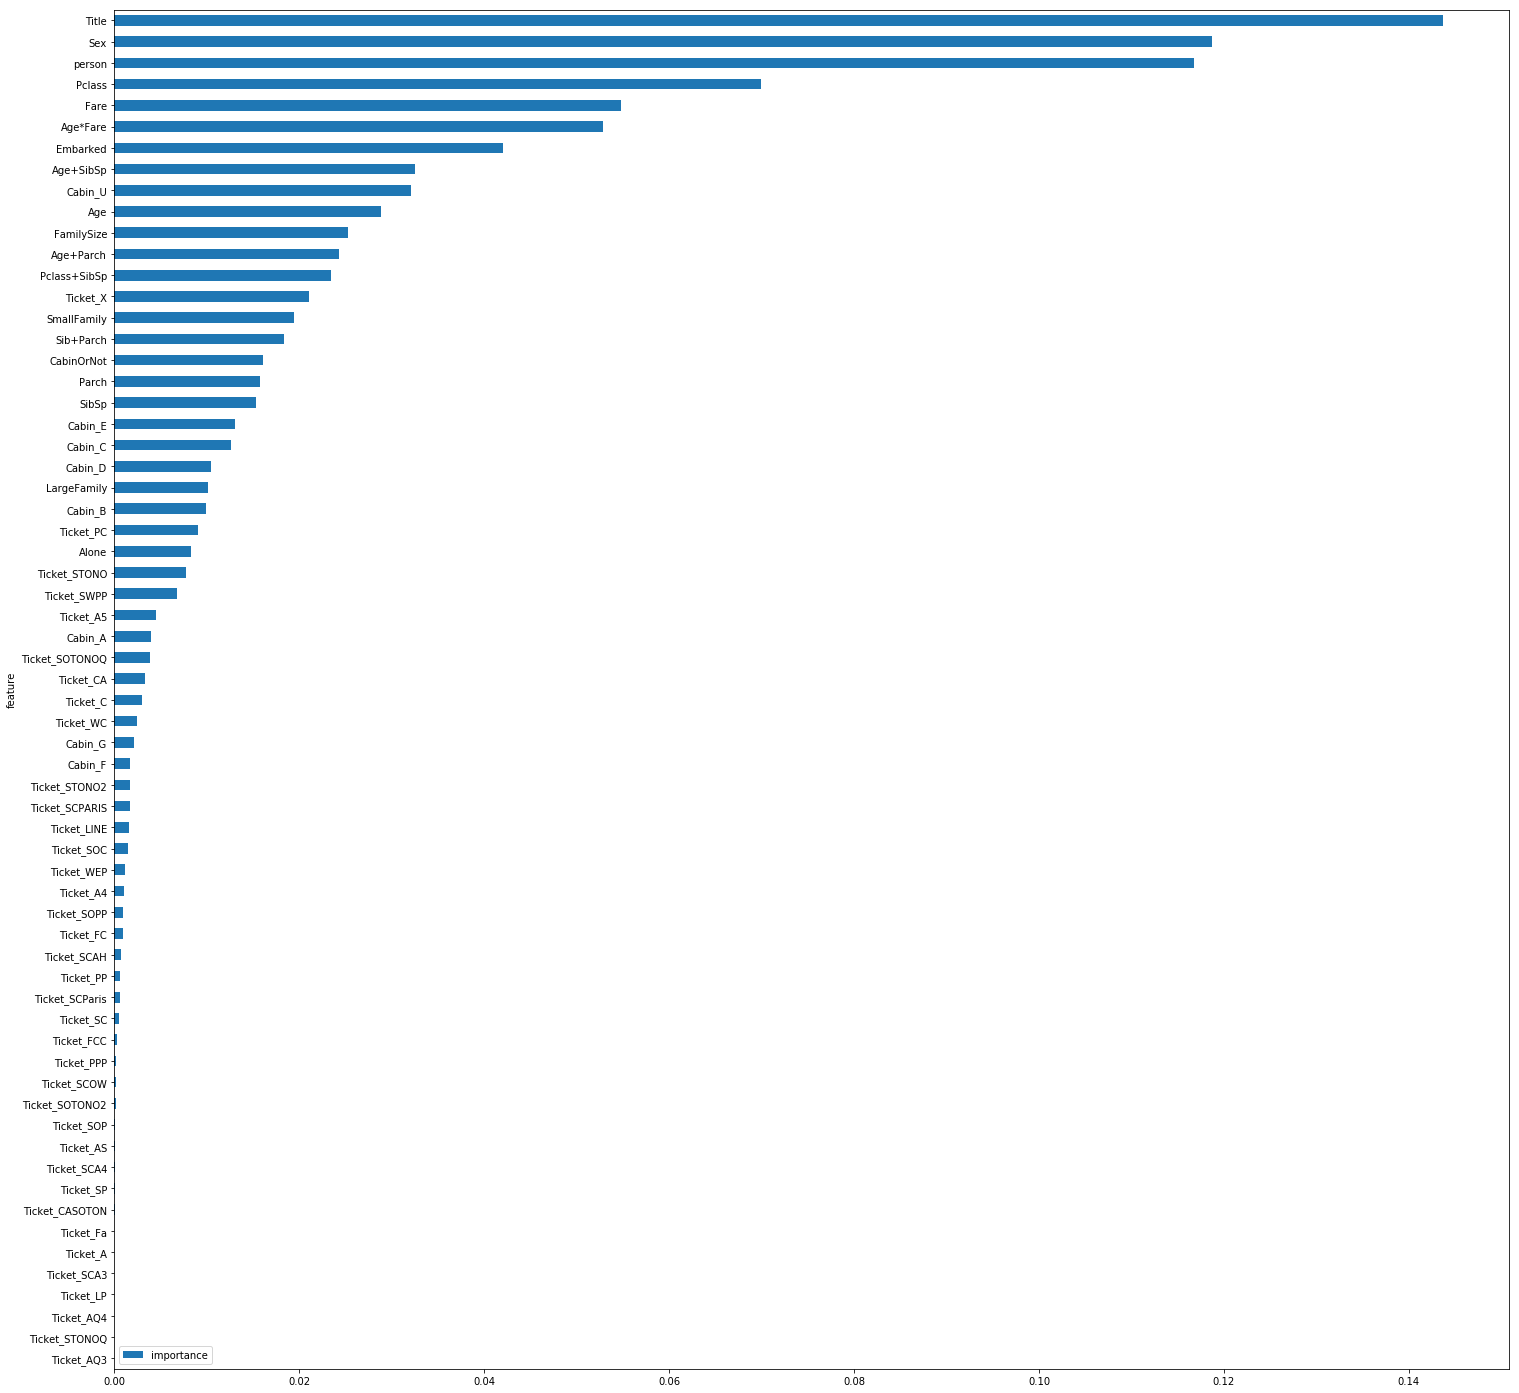

In [206]:
features.plot(kind='barh', figsize=(25, 25))

In [96]:
from sklearn.feature_selection import SelectFromModel

In [97]:
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(Xtrain)
print(train_reduced.shape)

(891, 18)


In [98]:
test_reduced = model.transform(Xtest)
print(test_reduced.shape)

(418, 18)


In [177]:
X_train,X_test,y_train,y_test = train_test_split(train_reduced,y,test_size=.30)

In [178]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train.ravel(), cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))    
        

# Model 1: Decision Tree

In [179]:
from sklearn.tree import DecisionTreeClassifier

In [180]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [181]:
print_score(dt_clf, X_train, y_train, X_test, y_test, train=True)
print_score(dt_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.9165

Classification Report: 
              precision    recall  f1-score   support

          0       0.89      0.98      0.93       373
          1       0.97      0.82      0.89       250

avg / total       0.92      0.92      0.92       623


Confusion Matrix: 
 [[367   6]
 [ 46 204]]

Average Accuracy: 	 0.7849
Accuracy SD: 		 0.0554
Test Result:

accuracy score: 0.7799

Classification Report: 
              precision    recall  f1-score   support

          0       0.82      0.86      0.84       176
          1       0.70      0.63      0.66        92

avg / total       0.78      0.78      0.78       268


Confusion Matrix: 
 [[151  25]
 [ 34  58]]



# model 3:AdaBoost

In [182]:
from sklearn.ensemble import AdaBoostClassifier


In [183]:
from sklearn.ensemble import BaggingClassifier

In [184]:
class_weight = {0:0.834, 1:0.166}

In [185]:
ada_clf = AdaBoostClassifier(base_estimator=None, n_estimators=100,
                         learning_rate=0.5,random_state=42)
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.5, n_estimators=100, random_state=42)

In [186]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=True)
print_score(ada_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.8347

Classification Report: 
              precision    recall  f1-score   support

          0       0.86      0.87      0.86       373
          1       0.80      0.78      0.79       250

avg / total       0.83      0.83      0.83       623


Confusion Matrix: 
 [[325  48]
 [ 55 195]]

Average Accuracy: 	 0.8107
Accuracy SD: 		 0.0513
Test Result:

accuracy score: 0.7873

Classification Report: 
              precision    recall  f1-score   support

          0       0.86      0.81      0.83       176
          1       0.67      0.74      0.70        92

avg / total       0.79      0.79      0.79       268


Confusion Matrix: 
 [[143  33]
 [ 24  68]]



# Model 4: Logistic 

In [187]:
from sklearn.linear_model import LogisticRegression

In [188]:
logcv = LogisticRegression()
logcv.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [189]:
print_score(logcv, X_train, y_train, X_test, y_test, train=True)
print_score(logcv, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.8347

Classification Report: 
              precision    recall  f1-score   support

          0       0.85      0.88      0.86       373
          1       0.81      0.76      0.79       250

avg / total       0.83      0.83      0.83       623


Confusion Matrix: 
 [[329  44]
 [ 59 191]]

Average Accuracy: 	 0.8267
Accuracy SD: 		 0.0618
Test Result:

accuracy score: 0.8134

Classification Report: 
              precision    recall  f1-score   support

          0       0.87      0.84      0.86       176
          1       0.71      0.76      0.74        92

avg / total       0.82      0.81      0.81       268


Confusion Matrix: 
 [[148  28]
 [ 22  70]]



# Model 5: Support Vector

In [190]:
from sklearn.svm import SVC

In [191]:
svc_clf = SVC(probability=True,kernel = 'linear')
svc_clf.fit(X_train,y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [192]:
print_score(svc_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svc_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.8299

Classification Report: 
              precision    recall  f1-score   support

          0       0.83      0.90      0.86       373
          1       0.83      0.72      0.77       250

avg / total       0.83      0.83      0.83       623


Confusion Matrix: 
 [[337  36]
 [ 70 180]]

Average Accuracy: 	 0.8250
Accuracy SD: 		 0.0547
Test Result:

accuracy score: 0.8172

Classification Report: 
              precision    recall  f1-score   support

          0       0.86      0.86      0.86       176
          1       0.74      0.73      0.73        92

avg / total       0.82      0.82      0.82       268


Confusion Matrix: 
 [[152  24]
 [ 25  67]]



# Model 6: Gradient Boosting

In [197]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=1, subsample=1.0, verbose=0,
              warm_start=False)

In [198]:
print_score(gb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(gb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.8411

Classification Report: 
              precision    recall  f1-score   support

          0       0.84      0.91      0.87       373
          1       0.84      0.74      0.79       250

avg / total       0.84      0.84      0.84       623


Confusion Matrix: 
 [[339  34]
 [ 65 185]]

Average Accuracy: 	 0.8298
Accuracy SD: 		 0.0516
Test Result:

accuracy score: 0.8134

Classification Report: 
              precision    recall  f1-score   support

          0       0.86      0.85      0.86       176
          1       0.72      0.74      0.73        92

avg / total       0.81      0.81      0.81       268


Confusion Matrix: 
 [[150  26]
 [ 24  68]]



# Extra Tree

In [199]:
from sklearn.ensemble import ExtraTreesClassifier

In [200]:
et_clf = ExtraTreesClassifier()

In [201]:
et_clf.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [202]:
print_score(et_clf, X_train, y_train, X_test, y_test, train=True)
print_score(et_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.9165

Classification Report: 
              precision    recall  f1-score   support

          0       0.89      0.98      0.93       373
          1       0.97      0.82      0.89       250

avg / total       0.92      0.92      0.92       623


Confusion Matrix: 
 [[367   6]
 [ 46 204]]

Average Accuracy: 	 0.7850
Accuracy SD: 		 0.0560
Test Result:

accuracy score: 0.8022

Classification Report: 
              precision    recall  f1-score   support

          0       0.84      0.87      0.85       176
          1       0.73      0.67      0.70        92

avg / total       0.80      0.80      0.80       268


Confusion Matrix: 
 [[153  23]
 [ 30  62]]



# Knn

In [147]:
from sklearn.neighbors import KNeighborsClassifier

In [148]:
knn_clf=KNeighborsClassifier()

In [149]:
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [150]:
print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.8225

Classification Report: 
              precision    recall  f1-score   support

          0       0.85      0.87      0.86       280
          1       0.77      0.74      0.76       165

avg / total       0.82      0.82      0.82       445


Confusion Matrix: 
 [[244  36]
 [ 43 122]]

Average Accuracy: 	 0.7527
Accuracy SD: 		 0.0432
Test Result:

accuracy score: 0.8049

Classification Report: 
              precision    recall  f1-score   support

          0       0.80      0.90      0.85       269
          1       0.82      0.66      0.73       177

avg / total       0.81      0.80      0.80       446


Confusion Matrix: 
 [[243  26]
 [ 61 116]]



In [203]:
 from sklearn.ensemble import RandomForestClassifier

In [204]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [205]:
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.9069

Classification Report: 
              precision    recall  f1-score   support

          0       0.89      0.96      0.93       373
          1       0.94      0.82      0.88       250

avg / total       0.91      0.91      0.91       623


Confusion Matrix: 
 [[359  14]
 [ 44 206]]

Average Accuracy: 	 0.8042
Accuracy SD: 		 0.0393
Test Result:

accuracy score: 0.7948

Classification Report: 
              precision    recall  f1-score   support

          0       0.83      0.87      0.85       176
          1       0.72      0.65      0.69        92

avg / total       0.79      0.79      0.79       268


Confusion Matrix: 
 [[153  23]
 [ 32  60]]



In [207]:
dt_pred = dt_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)
logcv_pred = logcv.predict(X_test)
svc_pred = svc_clf.predict(X_test)
gb_pred = gb_clf.predict(X_test)

In [211]:
from sklearn.ensemble import VotingClassifier

In [212]:
vote_clf = VotingClassifier(estimators=[('dt', dt_clf), ('rf', rf_clf),
                                        ('svc', svc_clf), ('ada',ada_clf),('gb',gb_clf),('log',logcv)], voting='soft', n_jobs=4)


In [213]:
vote_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=4, voting='soft', weights=None)

In [216]:
print_score(vote_clf, X_train, y_train, X_test, y_test, train=True)
print_score(vote_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.8925

Classification Report: 
              precision    recall  f1-score   support

          0       0.88      0.94      0.91       373
          1       0.91      0.82      0.86       250

avg / total       0.89      0.89      0.89       623


Confusion Matrix: 
 [[352  21]
 [ 46 204]]



C:\Users\Faysal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Faysal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Faysal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Faysal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

Average Accuracy: 	 0.8138
Accuracy SD: 		 0.0613
Test Result:

accuracy score: 0.8060

Classification Report: 
              precision    recall  f1-score   support

          0       0.85      0.86      0.85       176
          1       0.72      0.71      0.71        92

avg / total       0.81      0.81      0.81       268


Confusion Matrix: 
 [[151  25]
 [ 27  65]]



C:\Users\Faysal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Faysal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Faysal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Faysal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

In [214]:
vote_clf.score(X_train,y_train)

C:\Users\Faysal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8924558587479936

In [215]:
vote_clf.score(X_test,y_test)

C:\Users\Faysal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8059701492537313

In [217]:
output = vote_clf.predict(test_reduced)
df_output = pd.DataFrame()
aux = pd.read_csv('test.csv')
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('v_submission.csv', index=False)

C:\Users\Faysal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
